# Vacation Assignment

This assignment has two parts. 

In the first part you carry out some hypothesis tests; this is designed for you to practice both the process of running the different tests, and to make sure you understand the choices you are making when running tests.

The second part, 'revision', targets some Python syntax and (mmainly) some concepts that I want to make sure everyone has securely grasped. The answers to all conceptual quesitons can be found in the lectures and reading; searching for them is good revision!

Overall, the idea of this assignment is to help you consolidate what you learned this term and it should prepare you well for the collection in January. Please remember that searching for the answers (in the lecture notes etc) and trying things til it works (for coding) is part of the learning process; you are *supposed* to need to do that rather than having all the answers at your fingertips.

If you get stuck on something, try the lecture notes, try the reading, and try Google as there are many helpful 'how to' blogs out there and many blogs explaining statistical concepts. If you still are stuck after all that I suggest you leave a note on the particular question part for your tutor, perhaps offering your best guess at the answer. Try not to email them as they need a break over the vacation!

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Part 1 - data analysis exercises

In these questions you need to carry out various statistical tests. Please read the questions carefully and answer all parts - in particular if you are asked to *comment* on your results you must comment; this usually means interpret the results in plain English.

## Question 1 - Cloud seeding

Cloud seeding is a process by which a light aircraft dumps particulate matter into a cloud in the hope of causing precipitation (rain). The file CloudSeeding.csv contains standardized rainfall yield measures for seeded and unseeded clouds. These are real data from a study in 1975.

As a side note, cloud seeding does work and <a href='https://www.independent.co.uk/sport/olympics/how-beijing-used-rockets-to-keep-opening-ceremony-dry-890294.html'> is used to *prevent* rain </a> during important outdoor events - although it mimght have the side effect of causing a deluge nearby!

**a)  Download the data file and load the data into a `Pandas` dataframe called `clouds`**

In [2]:
clouds = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/cloudSeeding.csv')

**b) Plot the data for seeded and unseeded clouds in a way that shows the distribution of rainfall yields**

In [3]:
# Your code here

**c) Calculate the parameters of the best fitting Normal distributions for seeded and unseeded clouds respectively**

In [4]:
# Your code here

<font color='red'>State the parameters here


**d) Is a normal distribution a good fit to the data?**

*The here we overlay the best fitting normal on the data KDE plot:*

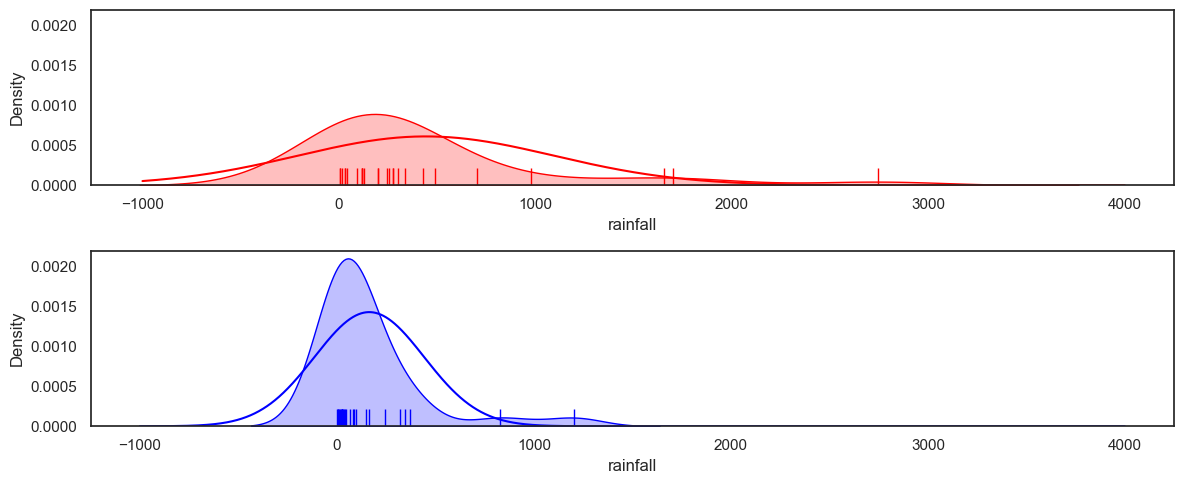

In [5]:
plt.figure(figsize=(12, 5))

seeded=clouds.query('status=="Seeded"').rainfall
unseeded=clouds.query('status=="Unseeded"').rainfall

# seeded clouds
plt.subplot(2,1,1)
x=range(-1000,4000)
y = stats.norm.pdf(x,seeded.mean(),seeded.std())
plt.plot(x,y,color=(1,0,0))
sns.kdeplot(data=seeded, color=[1,0,0], fill=True)
sns.rugplot(data=seeded, color=[1,0,0], height=0.1)
plt.ylim([0,0.0022])

# unseeded clouds
plt.subplot(2,1,2)
x=range(-1000,4000)
y = stats.norm.pdf(x,unseeded.mean(),unseeded.std())
plt.plot(x,y,color=(0,0,1))
sns.kdeplot(data=unseeded, color=[0,0,1], fill=True)
sns.rugplot(data=unseeded, color=[0,0,1], height=0.1)
plt.ylim([0,0.0022])

plt.tight_layout()
plt.show()

*Based on the plot above, the data are not well fitted by a normal distribution. Comment on the what you can see in the graph that suggests the normal distribution is a poor fit.*

<font color='red'>Your answer here

**e) Conduct three statistical tests of the researcher’s hypothesis, based on:**

*I.	Assumption of normality*

*II.	Permutation*

*III.	Ranked values*

*… in each case you should:*
* State the null and alternative hypothesis and the alpha value
* Report appropriate descriptive statistics for the test in question
* Carry out the test
* State the results of the test including the test statistic and p value. For the t-test, degrees of freedom should also be stated.
* Report your practical conclusion in plain English



**f) Comment on the relative merits of each possible choice of test for this dataset.**



## Question 2: Colouring books

A researcher hypothesises that working on adult colouring books is particularly relaxing and will lower resting heart rate.

She measures resting heart rate after one hour of colouring and after one hour of reading a novel in the same participants. The data are provided in the file ColouringHeartRate.csv. These are made-up data.

Download the data file and load the data into a Pandas dataframe called heartRate:


In [6]:
heartRate = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/ColouringHeartRate.csv')
heartRate

,participantID,colouring,reading
0,a,62,71
1,b,66,71
2,c,61,69
3,d,68,61
4,e,74,75
5,f,62,71
6,g,68,77
7,h,62,72
8,i,55,62
9,j,59,65


**b) Plot the data and comment.**

In [7]:
# Your code here

<font color='red'> Your comments here!

**c)	This is a within-subjects or repeated-measures design. With reference to your graph, explain the advantages of a within-subjects design in this particular experiment.**


**d) Control condition**

* Why do you think the researcher chose to compare heart rate after one hour of colouring to heart rate after one hour of reading, as opposed to comparing heart rate before and after colouring?*


<font color='red'>Your answer here

**e)	Conduct three statistical tests of the researcher’s hypothesis, based on** 

*I.	Assumption of normality*

*II.	Permutation*

*III.	Ranked values*

*… in each case you should:*

* State the null and alternative hypothesis and the alpha value
* Report appropriate descriptive statistics for the test in question
* Carry out the test
* State the results of the test including the test statistic and p value. For the t-test, degrees of freedom should also be stated.
* Report your practical conclusion in plain English


**f) Assumption of normality**

*The use of the t-test rests on an assumption of normality. For a paired test, it is the **differences** that must be normally distributed for the t-test to be valid*

*Can you explain why it is the distribution of the differences, rather than the data, that is important?*

<font color='red'>Your answer here

*Let's check if the distribution of differences is normal:*

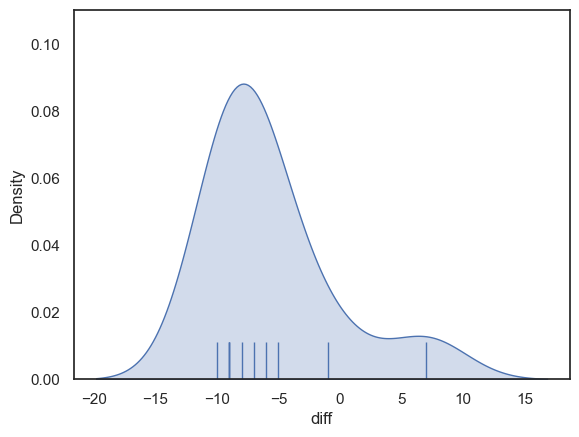

In [8]:
heartRate['diff']=heartRate.colouring-heartRate.reading
sns.kdeplot(heartRate['diff'], fill=True)
sns.rugplot(heartRate['diff'], height=0.1)
plt.show()

*It seems not - the differences have a distribution with positive skew (to be fair the sample size is too small to be really confident about this, but if unsure, it is better to avoid assuming normality)*

**g) Which statistical test do you think was the best choice for this dataset?**

<font color='red'>Your answer here

## Question 3: Reaction times

*Two participants, A and B, perform a choice reaction time task in which they must press one of two buttons depending on whether a word was a real or made-up word*

*The data are provided in the file ChoiceRTs.csv. These are made-up data*

*Download the data file and load the data into a Pandas dataframe called ChoiceRTs:*

In [9]:
ChoiceRTs = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/ChoiceRTs.csv')

**a) Plot the data**

*Plot the data for each participant in a way that illustrates the distribution of reaction times for each person and allows them to be compared. Two subplots within a single figure would be a good choice here.*

In [10]:
# Your code here

**c) Comment on the plot**


<font color='red'>Your answer here

**d) Data cleaning decision**

*The researcher decides that reaction times under 300ms (very fast responses) and over 700ms (very slow responses) should be excluded.*

*Do you think this is justified? Explain your answer.*

<font color='red'>Your answer here

**e) Data cleaning implementation**

*Make a new dataframe called `ChoiceRTs_clean` with the data with RTs outside the range 300-700ms replaced by `NaN`*

In [11]:
# Your code here

**f) Calculate the mean and sd of reaction time**

* before and 
* after excluding data outside the range 300-700 ms

*Comment on the difference in results*

**g) Statistical test**

*In each case:*

i)	all the data

ii) the data with RTs outside the range 300-700ms excluded

*conduct a permutation test to determine whether there is a difference in the mean reaction time between the two participants*

**HINT you will need to replace the function `np.mean()` with `np.nanmean()` as np.mean() returns a NaN if any of the values being averaged are NaN**

**h) Comment on the difference in results when outliers are excluded**

Comment on the difference in results for the permutation test, with data outside the range 300-700ms omitted or not



<font color='red'>Your answer here

## Part 2 - More Revision

### Long vs wideform data

*Pandas dataframes can be in longform or wideform (definitions <a href='https://www.statology.org/long-vs-wide-data/'>here</a>. We have seen examples of both throughout the term. Let's check you are comfortable with using both formats.*

*Here are same data are provided in longform and wideform:*

In [12]:
heightsWideform = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterData.csv')
heightsLongform = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterDataLongform.csv')

**a. Plot the data as a KDE plot (plot brothers and sisters as two separate KDEs)**

You might need to look back through the notes for examples of how to do this, or just try a few options to see what works.

In [13]:
# Your code here to plot the longform data

In [14]:
# Your code here to plot the wideform data

**b. Plot the data as a scatterplot of brother vs sister's height**

*Let's do this for both longform and wideform data. **Use the function `sns.regplot()`** which adds the best fitting regression line (the straight line that best fits through the data points) and add the line x=y:*

In [15]:
# Your code here to plot the wideform data
# use sns.regplot to make a sctterplot with regression line

# add the line x=y as a red dashed line


In [16]:
# Your code here to plot the longform data
# use sns.regplot to make a sctterplot with regression line

# add the line x=y as a red dashed line


**c. Get the mean height for brothers and sisters separately**

*Do this for the longform and wideform dataframes*

In [17]:
# Your code to get the mean brother and sister heights from the wideform data

In [18]:
# Your code to get the mean brother and sister heights from the wideform data

### Experimental design

**a. Paired design**

*i) What is a *paired* design (also called a *matched-pairs* design)?*

<font color='red'>Your answer here

*ii) What are the advantages of a paired design (compared to a independent samples design?)*

<font color='red'>Your answer here

*iii) In a paired design, we are testing whether the average *difference* withing pairs is significantly different from zero. For example, is the difference between each brother and his own sister reliably positive (brothers are taller than sisters)?*

*Look at the scatterplot above. In this case, why is it particularly helpful to use a* paired *design rather than an independent samples design?*

<font color='red'>Your answer here

**b) Repeated measures design**

*A **repeated measures** design is a type of paired design.*

*i) Explain what is the difference between a paired design (in general) and a repeated measures design.*

<font color='red'>Your answer here

*ii) Give an example of a study in which a repeated measures design could be used (ie, 'if we wanted to test xxx, we could use a repeated measures design in which we measure.....')*

<font color='red'>Your answer here

*iii) What potential pitfalls are there with repeated measures designs? How might they be mitigated?*

<font color='red'>Your answer here

**d) Detailed example**

*A researcher hypothesises that men are taller than women:*

$\mathcal{H_o}$: the mean height of men is equal to that of women

$\mathcal{H_a}$: the mean height of men is greater than that of women

*She conducts two permutation tests on the brother-sister data as follows:*

In [19]:
# TEST 1:
def dMeans(x,y):
    return np.mean(x)-np.mean(y)

results1 = stats.permutation_test((heightsWideform.brother, heightsWideform.sister), 
                                   dMeans, permutation_type='independent')
results1

PermutationTestResult(statistic=4.640000000000015, pvalue=0.082, null_distribution=array([ 1.28, -1.76,  1.36, ...,  0.08,  3.36,  5.52]))

In [20]:
# TEST 2:
def mDiff(x,y):
    return np.mean(x-y)

results2 = stats.permutation_test((heightsWideform.brother, heightsWideform.sister), 
                                   dMeans, permutation_type='samples')
results2

PermutationTestResult(statistic=4.640000000000015, pvalue=0.0002, null_distribution=array([ 0.48,  0.64, -1.12, ..., -0.4 , -1.44, -1.92]))

**i) Which test was correct and why?**

<font color='red'>Your answer here

**ii) The p-value for Test 2 is smaller, why?**

<font color='red'>Your answer here
    

**iii) In each case we specify a function to get the difference of means - what is the difference between `dMeans()` and `mDiff()`?**

<font color='red'>Your answer here
    

**iv) The Test Statistic is the same for tests 1 and 2. Can you explain why?**

<font color='red'>Your answer here

**v) The null distribution for tests 1 and 2 is quite different. Can you explain why?**

The null distributions are plotted for you here to help:

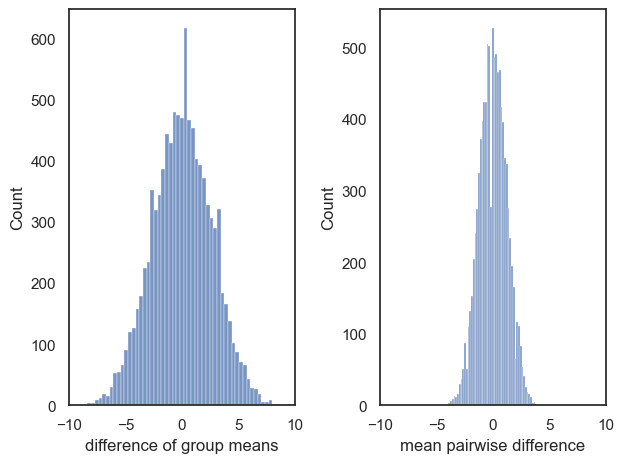

In [21]:
plt.subplot(1,2,1)
sns.histplot(results1.null_distribution)
plt.xlim([-10,10])
plt.xlabel('difference of group means')

plt.subplot(1,2,2)
sns.histplot(results2.null_distribution)
plt.xlim([-10,10])
plt.xlabel('mean pairwise difference')

plt.tight_layout()

<font color='red'>Your answer here


### One vs Two-tailed tests

*If we know the direction in which we expect an effect (men are taller than women) we can run a one-tailed test. Otherwise we must run a two-tailed test.*

*Load the following (made-up) data comparing the heights of female Psychology and female BMS students:*

In [22]:
heights = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/PsyBMSheights.csv')

*A researcher hypothesises that BMS students are taller than psychology students. She limits her analysis to female students:*
    
$\mathcal{H_o}$ The mean height of (female) psychology and BMS students are the same

$\mathcal{H_a}$ The mean height of (female) psychology students is less than the mean height of BMS students

*She decides to test at the $\alpha=0.05$ level*

**a) Is this a one or two tailed test?**

<font color='red'>Your answer here

**b) What's wrong in the following example?**

The researcher used a t-test to test her hypothesis as follows

In [23]:
stats.ttest_ind(heights.query('subject=="BMS"').height, heights.query('subject=="Psychology"').height, alternative='less')

TtestResult(statistic=1.823852779167176, pvalue=0.9627982812018988, df=48.0)

What has she done wrong?

<font color='red'>Your answer here

**c) Correct the mistake**

*Re-run the test, correcting the researcher's mistake*

In [24]:
# Your code here

**d) Run a two-tailed test**

*Say the researcher had no a-priori hypothesis about which subject hahs taller students. Then she should have stated her hypotheses as follows, and run a two-tailed test*


$\mathcal{H_o}$ The mean height of (female) psychology and BMS students are the same

$\mathcal{H_o}$ The mean height of (female) psychology students is different from mean height of BMS students

*She still wishes to test at the $\alpha=0.05$ level**

**Run the test yourself**

In [25]:
# Your code here

*i) How does the $p$-value from the two tailed test relate to that of (correct version of) the one-tailed test above?*

<font color='red'>Your answer here

*ii) The two-tailed test is not significant at the 5% level whilst the one-tailed test was significant. Can you explain why?*
* Key terms for your answer are the *critical region* of the test and the *critical value* or *cut-off value*
* These were introduced in lectures but if you don't remember them, a quick good brings up several tutorials

<font color='red'>Your answer here

**e) "Peeking"**

*Why did the researcher think that BMS students would be taller in the first place? Because when she plotted the data to check for outliers (which is indeed correct procedure), she noticed that the BMS students looked taller:*

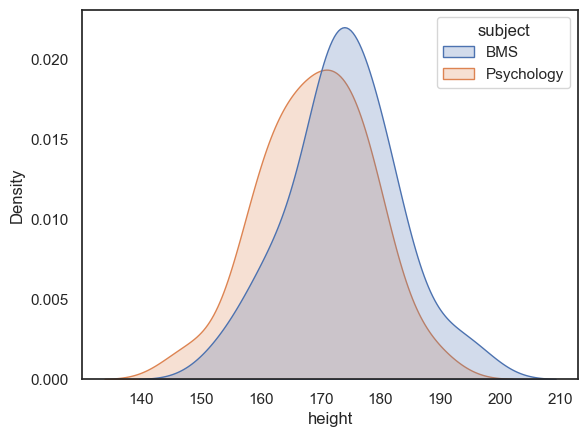

In [26]:
sns.kdeplot(data=heights, x='height', hue='subject', fill=True)
plt.show()

If the psychology students had looked taller, she would have done a one-tailed test in the other direction.

Using this approach (sometiems called "peeking" at the data) is wrong, because means that the chance of getting a 'significant' result if the null was true (the false positive rate) is double.

Can you explain why?

<font color='red'>Your answer here

*It is not wrong to inspect your data before running a test, but **your hypotheses (and in particular justification for a one-tailed test) should reflect predictions you would be able to make without seeing the particular sample of data**.*